In [7]:
import nltk
import re
from nltk.corpus import reuters
from nltk.probability import FreqDist
import random

nltk.download('reuters')
nltk.download('punkt')

words = reuters.words()
filtered_words = [word.lower() for word in words if re.match(r'^[a-zA-Z]+$', word)]
fdist = FreqDist(filtered_words)
random_words = random.sample(filtered_words, 10)

print("Random Words Sample:", random_words)


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Random Words Sample: ['nine', 'from', 'tmoc', 'house', 'said', 'a', 'hectares', 'have', 'doubtful', 'rises']


In [17]:
def get_ngrams(text, n):
    return list(ngrams(text, n))

bigrams = get_ngrams(filtered_words, 2)
bigram_fdist = FreqDist(bigrams)
print(bigram_fdist.most_common(10))

[(('in', 'the'), 7093), (('of', 'the'), 6912), (('u', 's'), 5697), (('said', 'the'), 5355), (('mln', 'dlrs'), 4400), (('said', 'it'), 4367), (('vs', 'mln'), 3945), (('mln', 'vs'), 3921), (('cts', 'vs'), 3311), (('the', 'company'), 3128)]


In [19]:
import math
from nltk import word_tokenize
from collections import defaultdict


file_ids = reuters.fileids()
raw_text = "\n".join([reuters.raw(fid) for fid in file_ids])
paragraphs_raw = raw_text.split('\n\n')  

paragraphs = []
for paragraph in paragraphs_raw:
    tokens = word_tokenize(paragraph)
    words = [w.lower() for w in tokens if re.fullmatch(r'[a-zA-Z]+', w)]
    if words:
        paragraphs.append(words)


word_count = FreqDist()
cooccurrence = defaultdict(int)
total_paragraphs = len(paragraphs)

for paragraph in paragraphs:
    unique_words = set(paragraph)
    for word in unique_words:
        word_count[word] += 1
    for w1 in unique_words:
        for w2 in unique_words:
            if w1 == w2:
                continue
            pair = tuple(sorted((w1, w2)))
            cooccurrence[pair] += 1


ppmi = {}
for pair, count in cooccurrence.items():
    p_w1_w2 = count / total_paragraphs
    p_w1 = word_count[pair[0]] / total_paragraphs
    p_w2 = word_count[pair[1]] / total_paragraphs
    pmi = math.log2(p_w1_w2 / (p_w1 * p_w2)) if p_w1_w2 > 0 else 0
    ppmi[pair] = max(pmi, 0)

print("Top 10 PPMI pairs:")
for pair, score in sorted(ppmi.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{pair}: {score:.4f}")


Top 10 PPMI pairs:
('avowed', 'sheen'): 14.5078
('button', 'sheen'): 14.5078
('inflict', 'sheen'): 14.5078
('avowed', 'button'): 14.5078
('avowed', 'inflict'): 14.5078
('button', 'inflict'): 14.5078
('harahap', 'hasrul'): 14.5078
('paian', 'sawn'): 14.5078
('nainggolan', 'paian'): 14.5078
('nainggolan', 'sawn'): 14.5078


In [20]:
window_size = 4 

word_count = FreqDist(filtered_words)
cooccurrence = defaultdict(int)

for i in range(len(filtered_words)):
    center_word = filtered_words[i]
    window_start = max(0, i - window_size)
    window_end = min(len(filtered_words), i + window_size + 1)
    for j in range(window_start, window_end):
        if i == j:
            continue
        context_word = filtered_words[j]
        pair = tuple(sorted((center_word, context_word)))
        cooccurrence[pair] += 1


total_pairs = sum(cooccurrence.values())

ppmi = {}
for pair, count in cooccurrence.items():
    p_w1_w2 = count / total_pairs
    p_w1 = word_count[pair[0]] / len(filtered_words)
    p_w2 = word_count[pair[1]] / len(filtered_words)
    pmi = math.log2(p_w1_w2 / (p_w1 * p_w2)) if p_w1_w2 > 0 else 0
    ppmi[pair] = max(pmi, 0)

print(f"Top 10 PPMI pairs (window size = {window_size}):")
for pair, score in sorted(ppmi.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{pair}: {score:.4f}")


Top 10 PPMI pairs (window size = 4):
('duck', 'lame'): 18.3399
('enhancer', 'tetra'): 18.3399
('sloshing', 'trillions'): 18.3399
('nendick', 'referral'): 18.3399
('iniziativa', 'meta'): 18.3399
('iniziativa', 'inzi'): 18.3399
('inzi', 'meta'): 18.3399
('auxt', 'csn'): 18.3399
('cayb', 'cayuga'): 18.3399
('gdyn', 'geodynamics'): 18.3399


In [23]:
MIN_FREQ = 10

file_ids = reuters.fileids()
raw_text = "\n".join([reuters.raw(fid) for fid in file_ids])
paragraphs_raw = raw_text.split('\n\n')  


paragraphs = []
for paragraph in paragraphs_raw:
    tokens = word_tokenize(paragraph)
    words = [w.lower() for w in tokens if re.fullmatch(r'[a-zA-Z]+', w)]
    if words:
        paragraphs.append(words)

word_count = FreqDist()
for paragraph in paragraphs:
    word_count.update(paragraph)

vocab = {w for w, f in word_count.items() if f >= MIN_FREQ}
cooccurrence = defaultdict(int)
total_paragraphs = len(paragraphs)

for paragraph in paragraphs:
    unique_words = set(paragraph)
    filtered_words = [w for w in unique_words if w in vocab]
    
    for w1 in filtered_words:
        for w2 in filtered_words:
            if w1 == w2:
                continue
            pair = tuple(sorted((w1, w2)))
            cooccurrence[pair] += 1

ppmi = {}
for pair, count in cooccurrence.items():
    p_w1_w2 = count / total_paragraphs
    p_w1 = word_count[pair[0]] / total_paragraphs
    p_w2 = word_count[pair[1]] / total_paragraphs
    pmi = math.log2(p_w1_w2 / (p_w1 * p_w2)) if p_w1_w2 > 0 else 0
    ppmi[pair] = max(pmi, 0)

print("Top 10 PPMI pairs:")
for pair, score in sorted(ppmi.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{pair}: {score:.4f}")

Top 10 PPMI pairs:
('denshin', 'denwa'): 11.1859
('denshin', 'kokusai'): 11.1859
('denwa', 'kokusai'): 11.1859
('bko', 'ht'): 10.9228
('kokusai', 'telesis'): 10.6713
('denshin', 'telesis'): 10.6713
('denwa', 'telesis'): 10.6713
('govett', 'hoare'): 10.6333
('aquino', 'corazon'): 10.6009
('jenrette', 'lufkin'): 10.5935


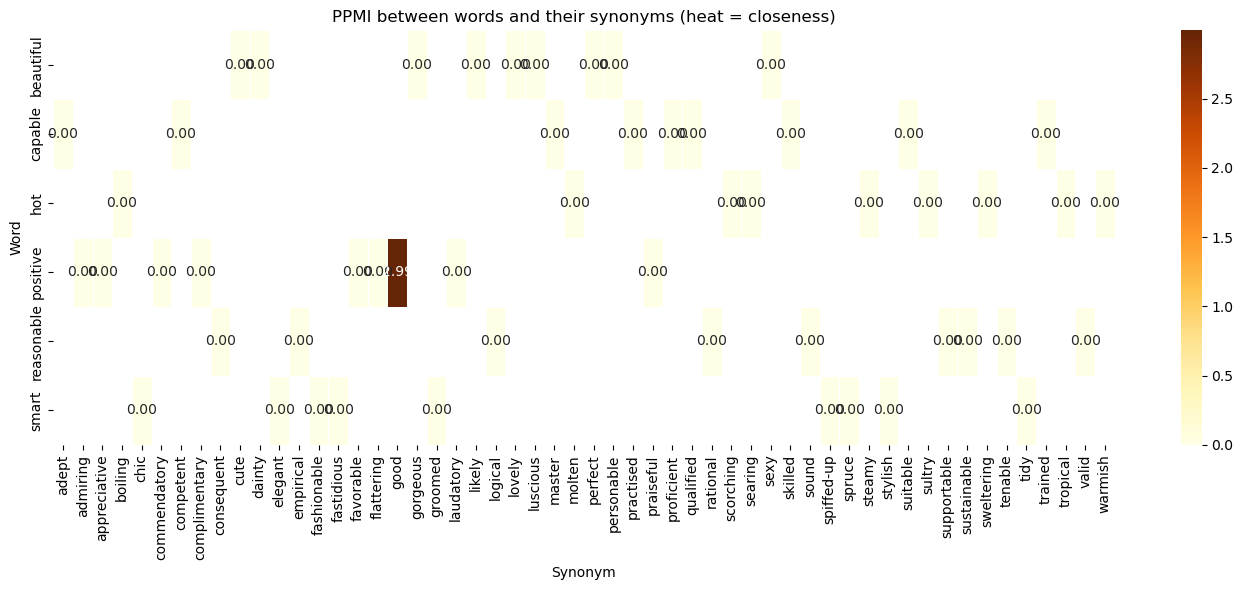


PPMI Order Consistency Check:
hot: ✅ Order respected (0.00 ≥ 0.00 ≥ 0.00)
beautiful: ✅ Order respected (0.00 ≥ 0.00 ≥ 0.00)
smart: ✅ Order respected (0.00 ≥ 0.00 ≥ 0.00)
reasonable: ✅ Order respected (0.00 ≥ 0.00 ≥ 0.00)
capable: ✅ Order respected (0.00 ≥ 0.00 ≥ 0.00)
positive: ✅ Order respected (1.00 ≥ 0.00 ≥ 0.00)


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

synonyms_by_strength = {
    'hot': [
        ['boiling', 'searing', 'molten'],
        ['scorching', 'sweltering', 'sultry'],
        ['steamy', 'tropical', 'warmish']
    ],
    'beautiful': [
        ['lovely', 'gorgeous', 'cute'],
        ['perfect', 'sexy', 'likely'],
        ['personable', 'dainty', 'luscious']
    ],
    'smart': [
        ['elegant', 'stylish', 'fashionable'],
        ['chic', 'spruce', 'tidy'],
        ['fastidious', 'groomed', 'spiffed-up']
    ],
    'reasonable': [
        ['logical', 'rational', 'valid'],
        ['sound', 'consequent', 'empirical'],
        ['sustainable', 'tenable', 'supportable']
    ],
    'capable': [
        ['suitable', 'qualified', 'competent'],
        ['skilled', 'adept', 'proficient'],
        ['practised', 'master', 'trained']
    ],
    'positive': [
        ['favorable', 'good', 'appreciative'],
        ['complimentary', 'commendatory', 'admiring'],
        ['laudatory', 'praiseful', 'flattering']
    ]
}

data = []
for word, synonym_groups in synonyms_by_strength.items():
    for level, group in enumerate(synonym_groups, 1):
        for synonym in group:
            pair = tuple(sorted((word, synonym)))
            score = ppmi.get(pair, 0)
            data.append({'Word': word, 'Synonym': synonym, 'PPMI': score, 'Group': level})

df = pd.DataFrame(data)

pivot_df = df.pivot(index='Word', columns='Synonym', values='PPMI')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)
plt.title("PPMI between words and their synonyms (heat = closeness)")
plt.tight_layout()
plt.show()

def check_ppmi_order(ppmi, synonyms_by_strength):
    print("\nPPMI Order Consistency Check:")
    for word, synonym_groups in synonyms_by_strength.items():
        values = []
        for group in synonym_groups:
            group_values = []
            for synonym in group:
                pair = tuple(sorted((word, synonym)))
                group_values.append(ppmi.get(pair, 0))
            avg_value = sum(group_values) / len(group_values) if group_values else 0
            values.append(avg_value)

        if values[0] >= values[1] >= values[2]:
            print(f"{word}: ✅ Order respected ({values[0]:.2f} ≥ {values[1]:.2f} ≥ {values[2]:.2f})")
        else:
            print(f"{word}: ❌ Order mismatch ({values[0]:.2f}, {values[1]:.2f}, {values[2]:.2f})")

check_ppmi_order(ppmi, synonyms_by_strength)
